In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df_business_demographics_xlsx = pd.read_excel('../data/raw/business-demographics.xlsx')
df_business_demographics_xlsx

,Name,Business Demographics
0,ShortName,Business Demographics
1,NaN,NaN
2,Theme,Economy
3,Sub-theme,Business
4,NaN,NaN
5,Title,Business Demographics
6,Description,"Enterprise Births, Enterprise Deaths, Active E..."
7,Subject,Business
8,Subject.keyword,"Enterprise Births, Enterprise Deaths, Active E..."
9,Publisher,ONS


In [3]:
df_business_demographics_cvs = pd.read_csv('../data/raw/business-demographics.csv')
df_business_demographics_cvs

,,area,year,active_enterprises,births,birth_rate,deaths,death_rate
0,E09000001,City of London,2004,11980,1175,9.8,1160,9.7
1,E09000002,Barking and Dagenham,2004,3120,480,15.4,410,13.1
2,E09000003,Barnet,2004,19655,2435,12.4,3015,15.3
3,E09000004,Bexley,2004,6450,940,14.6,800,12.4
4,E09000005,Brent,2004,11295,1800,15.9,1745,15.4
...,...,...,...,...,...,...,...,...
964,S92000003,Scotland,2022,174340,18870,10.8,19640,11.3
965,N92000002,Northern Ireland,2022,64745,5385,8.3,5290,8.2
966,K04000001,England And Wales,2022,2685600,312670,11.6,320560,11.9
967,K03000001,Great Britain,2022,2859940,331540,11.6,340200,11.9


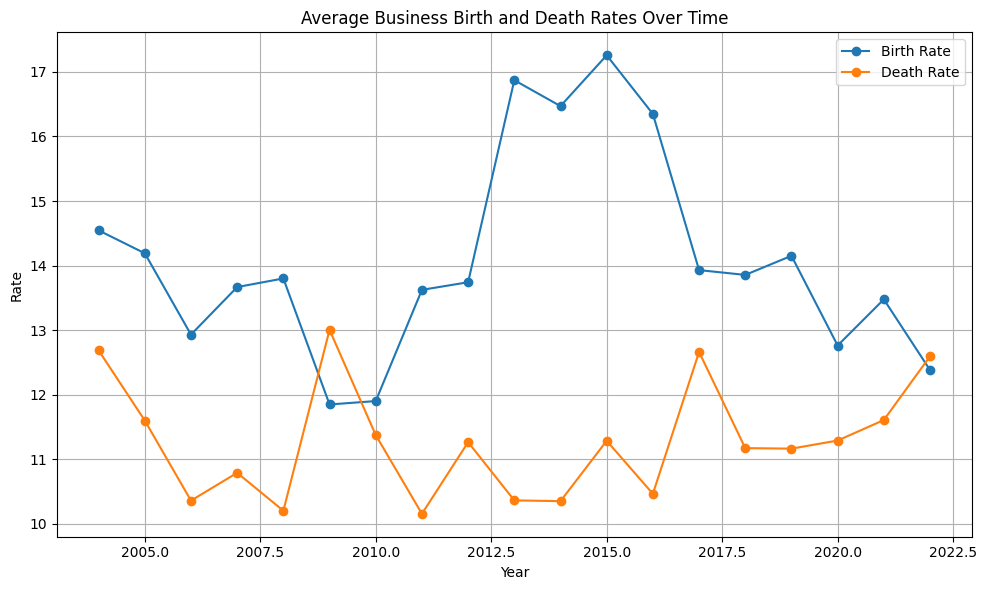

In [4]:
yearly_stats = df_business_demographics_cvs.groupby('year')[['birth_rate', 'death_rate']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['year'], yearly_stats['birth_rate'], marker='o', label='Birth Rate')
plt.plot(yearly_stats['year'], yearly_stats['death_rate'], marker='o', label='Death Rate')
plt.title('Average Business Birth and Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


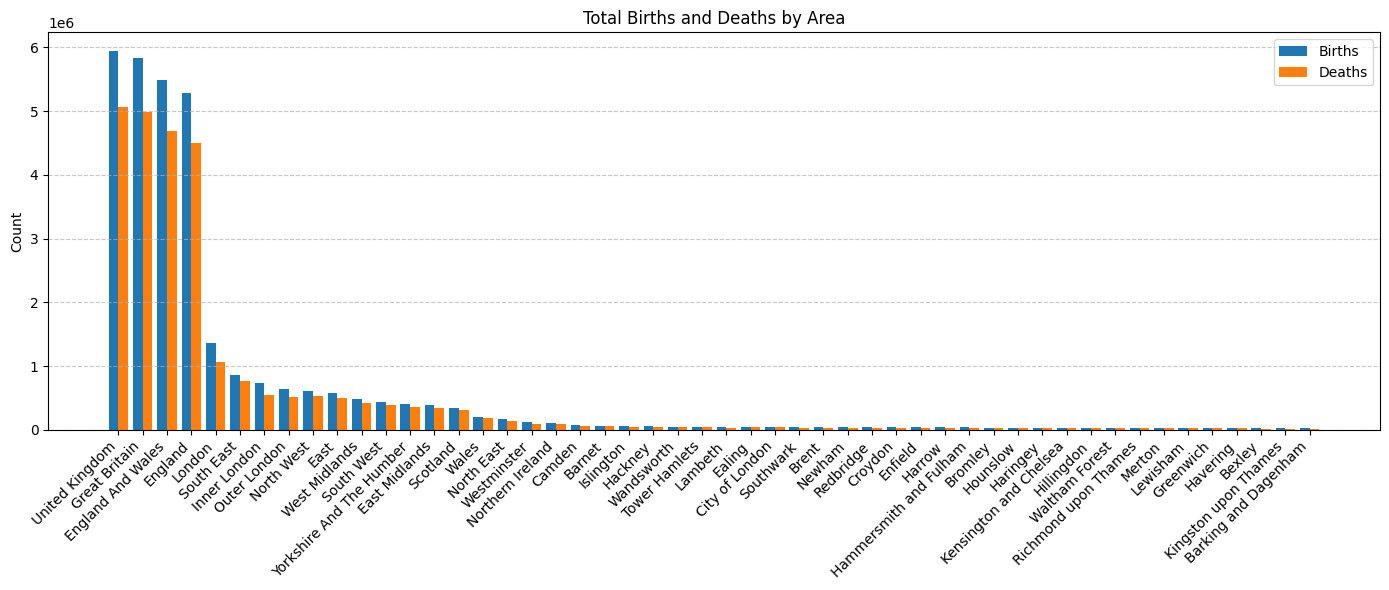

In [5]:
def show_birth_death_bar_plots_by_area(df, top, sort_by):
    df_copy = df.copy()
    area_stats = df_copy.groupby('area')[['births', 'deaths']].sum().reset_index()
    area_stats = area_stats.sort_values(sort_by, ascending=False).head(top)  
    plt.figure(figsize=(14, 6))
    bar_width = 0.4
    x = range(len(area_stats))
    plt.bar([i - bar_width/2 for i in x], area_stats['births'], width=bar_width, label='Births')
    plt.bar([i + bar_width/2 for i in x], area_stats['deaths'], width=bar_width, label='Deaths')
    plt.xticks(ticks=x, labels=area_stats['area'], rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Total Births and Deaths by Area')
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

show_birth_death_bar_plots_by_area(df_business_demographics_cvs, 50, 'births')

In [14]:
def top_areas_by_birth_death_ratio(df, top):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['death_rate'] > 0]
    df_copy['birth_death_ratio'] = df_copy['birth_rate'] / df_copy['death_rate']
    area_avg_ratios = df_copy.groupby('area')['birth_death_ratio'].mean().reset_index()
    top_areas = area_avg_ratios.sort_values('birth_death_ratio', ascending=False).head(top)
    return top_areas

top_areas = top_areas_by_birth_death_ratio(df_business_demographics_cvs, 34)
top_areas.head(5)

,area,birth_death_ratio
16,Hackney,1.570569
31,Newham,1.541195
0,Barking and Dagenham,1.490096
27,Lambeth,1.392508
24,Islington,1.391696


In [15]:
boundaries = gpd.read_file('../data/raw/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
boundaries = boundaries.rename(columns={'NAME': 'area'})
boundaries

,area,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4..."


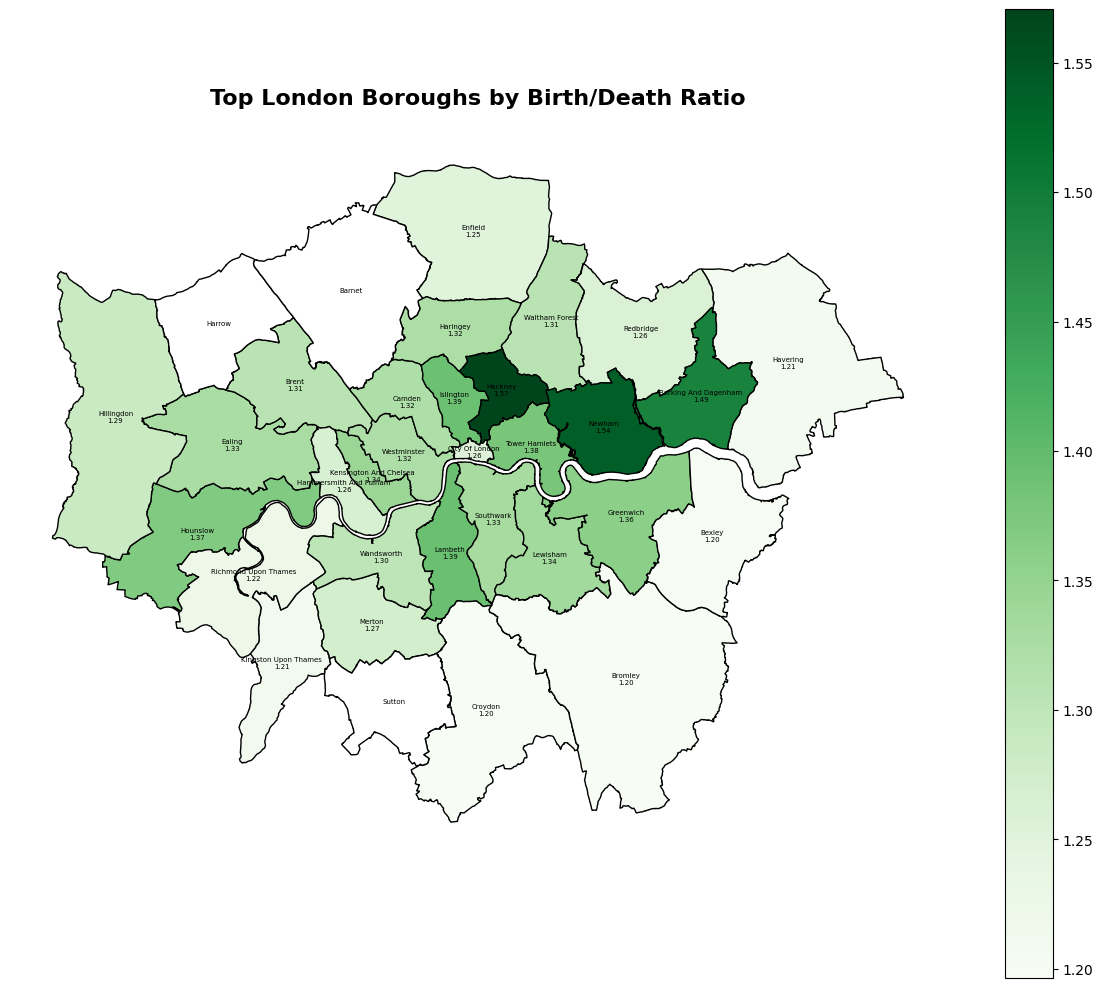

In [16]:
boundaries_by_ratios = boundaries.merge(top_areas[['area', 'birth_death_ratio']], on='area', how='left') 
fig, ax = plt.subplots(figsize=(12, 10))

boundaries_by_ratios.plot(
    ax=ax,
    column='birth_death_ratio',
    cmap='Greens',
    legend=True,
    edgecolor='black',
    missing_kwds={
        "color": "white",
        "edgecolor": "black"
    }
)

for _, row in boundaries_by_ratios.iterrows():
    centroid = row['geometry'].centroid
    name = row['area'].title()

    if pd.notna(row['birth_death_ratio']):
        label = f"{name}\n{row['birth_death_ratio']:.2f}"
    else:
        label = name

    ax.text(centroid.x, centroid.y, label, ha='center', va='center', fontsize=5, color='black')

# Improve title
plt.title("Top London Boroughs by Birth/Death Ratio", fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()
